(17, 784)
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34


/home/farhan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in exp
  import sys


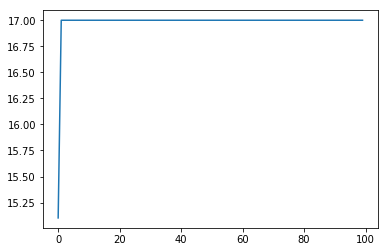

In [10]:
import numpy as np
import csv
import matplotlib.pyplot as plt

#activation fucntion
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s

#cross_entropy
def compute_loss(Y, Y_hat):
    L = ((-1) * np.sum( np.dot(np.log(Y_hat),Y) ) + np.sum( np.dot(np.log(1-Y_hat),(1-Y)) ) )
    return L

#error
def error(d,y,derive=False):
    if derive == True:
        return (y-d)
    return 0.5 * (d-y)*(d-y)

#importing csv files
workdir = "/home/farhan/Downloads/NN Class/Data/Part2/"
x1_train = np.genfromtxt (workdir+'Part2_1_Train.csv', delimiter=",")
x3_train = np.genfromtxt (workdir+'Part2_3_Train.csv', delimiter=",")
x1_test = np.genfromtxt (workdir+'Part2_1_Test.csv', delimiter=",")
x3_test = np.genfromtxt (workdir+'Part2_3_Test.csv', delimiter=",")
x_train = np.concatenate((x1_train, x3_train), axis = 0).T
x_test = np.concatenate((x1_test, x3_test), axis =0).T

print(x1_train.shape)

#flattening

#initialize weights
w1 = np.random.normal(0,1,(784,))
w2 = np.random.normal(0,1,(784,))

#labels
ls =[]
ls3=[]
lst = []
ls3t= []
for _ in range (17):
    ls.append(np.array([1,0]))
    ls3.append(np.array([0,1]))
for _ in range (50):
    lst.append(np.array([1,0]))
    ls3t.append(np.array([0,1]))
    
Y1 = np.asarray(ls)
Y3 = np.asarray(ls3)
Y  = np.concatenate((Y1, Y3), axis =0)
Y1t = np.asarray(lst)
Y3t = np.asarray(ls3t)
Yt  = np.concatenate((Y1t, Y3t), axis =0)
   
#class 1
#building and training
X = x_train
Xt = x_test
lr = 1 #learning rate

error_t = np.zeros((100))

for i in range(100):
    #forwardfeed for X1_train    
    Z1 = np.dot(w1, X) #filter1
    A1 = sigmoid(Z1) #perception 1
    Z2 = np.dot(w2, X) #filter2
    A2 = sigmoid(Z2) #perceptron 2
    
    #output error
    err1 = (0.5) * np.power((A1 - Y[:,0]),2) 
    err2 = (0.5) * np.power((A2 - Y[:,0]),2)
    err = err1 + err2
    #print(len(err))
    error_t[i] += err.sum()
    #backprop
    delta_11 = error(Y[:,0],A1, derive=True)
    delta_21 = sigmoid(A1)
    de1 = delta_11 * delta_21
    delta_12 = error(Y[:,1], A2, derive=True)
    delta_22 = sigmoid(A2)
    de2 = delta_12*delta_22
    
    #updating weights
    dw1 = A1* de1 
    dw2 = A2* de2
    dw11 = np.dot(X, (Y[:,0]-dw1).T)
    dw22 = np.dot(X, (Y[:,1]-dw2).T)
    #for w1
    #update weights
    w1 = w1 - (lr*dw11)
    w2 = w2 - (lr*dw22)
    #forwardfeed for X1_test
    Z1t = np.dot(w1, Xt) #filter1
    A1t = sigmoid(Z1t) #perception 1
    Z2t = np.dot(w2, Xt) #filter2
    A2t = sigmoid(Z2t) #perceptron 2
    
    #output error
    err1t = (0.5) * np.power((A1t - Yt[:,0]),2) 
    err2t = (0.5) * np.power((A2t - Yt[:,0]),2)
    errt = err1t + err2t
    

#plt.plot(err)
#plt.plot(errt)
#plt.ylabel('Error')
#plt.xlabel('Epoch')
plt.plot(error_t)
plt.show()



    


    